# 01 — Chargement & EDA (Gold)

But: charger la feuille **Gold**, vérifier les colonnes, visualiser rapidement.

In [1]:
import sys
from pathlib import Path

ROOT = Path.cwd().parent
SRC = ROOT / "src"
sys.path.insert(0, str(SRC))

print("ROOT:", ROOT)
print("SRC exists:", SRC.exists())
print("sys.path[0]:", sys.path[0])

import utils
print("utils imported from:", utils.__file__)


ROOT: c:\Users\fayca\Downloads\hackathon_gold_project\hackathon_gold_project
SRC exists: True
sys.path[0]: c:\Users\fayca\Downloads\hackathon_gold_project\hackathon_gold_project\src
utils imported from: c:\Users\fayca\Downloads\hackathon_gold_project\hackathon_gold_project\src\utils.py


In [2]:
import importlib
import data
print("data imported from:", data.__file__)
importlib.reload(data)
print("reloaded OK")


data imported from: c:\Users\fayca\Downloads\hackathon_gold_project\hackathon_gold_project\src\data.py
reloaded OK


In [3]:
from pathlib import Path
import pandas as pd

XLSX = Path(ROOT) / "dataset_train.xlsx"
print("Excel exists:", XLSX.exists(), "size MB:", round(XLSX.stat().st_size/1e6, 2))

xls = pd.ExcelFile(XLSX, engine="openpyxl")
print("Sheets:", xls.sheet_names)

df_small = pd.read_excel(XLSX, sheet_name="Gold", engine="openpyxl", nrows=30)
print(df_small.shape)
df_small.head()


Excel exists: True size MB: 5.85
Sheets: ['MSCI world', 'S&P 500 index', 'Euro stoxx 50', 'Dax', 'CAC 40', 'Gold', 'Pétrole', 'Dollar Index', 'EURUSD']
(30, 8)


,Tableau 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Date,Open,High,Low,Close,SMAVG (50) on Close,SMAVG (100) on Close,SMAVG (240) on Close
1,2018-12-31,1279.85,1284.15,1277.52,1282.49,1235.32,1218.05,1263.86
2,2018-12-28,1275.71,1282.23,1274.31,1280.71,1234.11,1217.16,1264.1
3,2018-12-27,1267.14,1279.04,1266.65,1275.71,1233.03,1216.46,1264.39
4,2018-12-26,1268.64,1279.11,1264.39,1267.14,1232.03,1215.83,1264.69


In [4]:
import sys, os
from pathlib import Path

# Add src/ to path
ROOT = Path.cwd().parent
SRC = ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))

import numpy as np
import pandas as pd

from utils import get_logger
logger = get_logger("notebook", log_file=str(ROOT/"logs"/"run.log"))

from data import load_ohlc_from_xlsx

XLSX = str(ROOT / "dataset_train.xlsx")
df = load_ohlc_from_xlsx(XLSX, sheet_name="Gold")
logger.info("date min=%s date max=%s", df['Date'].min(), df['Date'].max())
df.tail()


2025-12-15 15:54:56,389 | INFO | data | Loading sheet=Gold from c:\Users\fayca\Downloads\hackathon_gold_project\hackathon_gold_project\dataset_train.xlsx
2025-12-15 15:54:59,002 | INFO | data | Loaded 11340 rows, columns=['Date', 'Open', 'High', 'Low', 'Close', 'smavg_50', 'smavg_100', 'smavg_240']
2025-12-15 15:54:59,009 | INFO | notebook | date min=1969-08-29 00:00:00 date max=2018-12-31 00:00:00


,Date,Open,High,Low,Close,smavg_50,smavg_100,smavg_240
11335,2018-12-25,1269.13,1269.13,1268.54,1268.54,1231.14,1215.30,1265.07
11336,2018-12-26,1268.64,1279.11,1264.39,1267.14,1232.03,1215.83,1264.69
11337,2018-12-27,1267.14,1279.04,1266.65,1275.71,1233.03,1216.46,1264.39
11338,2018-12-28,1275.71,1282.23,1274.31,1280.71,1234.11,1217.16,1264.10
11339,2018-12-31,1279.85,1284.15,1277.52,1282.49,1235.32,1218.05,1263.86


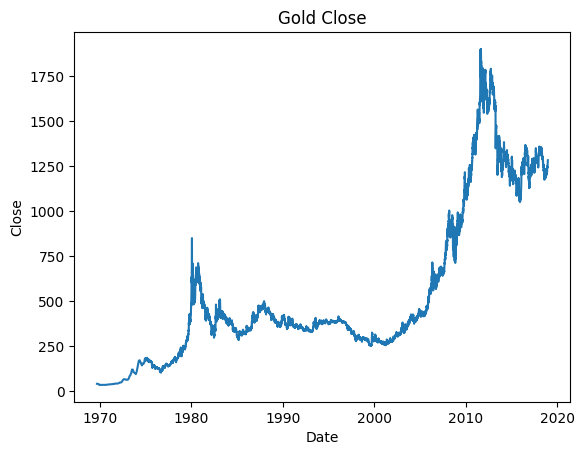

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Date'], df['Close'])
plt.title('Gold Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()


✅ Attendu: dates croissantes, pas de NaN massifs, OHLC cohérents.